In [44]:
#Todo
#1. Write insights drawn from info and visuals- annonate
#2. Correct class imbalance

# Loading and Preparing for EDA and Model Building

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for the training set
train_datagen = ImageDataGenerator(rescale=1./255,  # normalize pixel values
                                   rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   shear_range=0.2,  # set range for random shear
                                   zoom_range=0.2,  # set range for random zoom
                                   horizontal_flip=True,  # randomly flip images
                                   validation_split=0.2)  # set fraction of images reserved for validation

#All of this can be adjusted to fine tune our model later on.

In [46]:
# Load the images from their directories
train_generator = train_datagen.flow_from_directory(
    'C:/Users/calve/Downloads/satdata/data',
    target_size=(200, 200),  # resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # this means our generator will only yield batches of data, no labels
    subset='training')  # set as training data

Found 4505 images belonging to 5 classes.


In [47]:
validation_generator = train_datagen.flow_from_directory(
    'C:/Users/calve/Downloads/satdata/data',
    target_size=(200, 200),  
    batch_size=32,
    class_mode='categorical',  
    subset='validation')  # set as validation data

Found 1126 images belonging to 5 classes.


# Sample Images

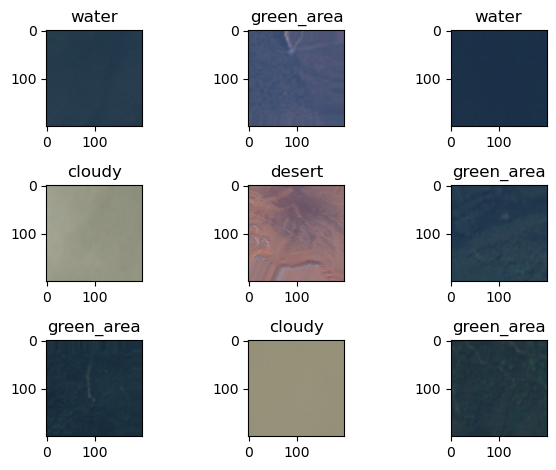

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# get label to class_id mapping
label_map = (train_generator.class_indices)

# reverse it to get class_id to label mapping
id_to_label_map = {v: k for k, v in label_map.items()}

# get a batch of data
X_batch, y_batch = next(train_generator)

# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_batch[i])
    plt.title(id_to_label_map[np.argmax(y_batch[i])]) #get the label corresponding to the class_id
plt.tight_layout()
plt.show()

# Class Distribution

In [49]:
import plotly.graph_objs as go

# Create a trace for the bar chart
trace = go.Bar(
    x=class_names,
    y=[class_counts[i] for i in range(len(class_names))],
    text=[class_counts[i] for i in range(len(class_names))],
    textposition='auto',
    marker=dict(
        color=['rgba(34, 167, 240, 1)', 'rgba(255, 191, 0, 1)',
               'rgba(46, 204, 113, 1)', 'rgba(214, 69, 65, 1)'],  # specify colors here
    )
)

data = [trace]

layout = go.Layout(
    title='Number of Samples per Class',
    xaxis=dict(title='Classes'),
    yaxis=dict(title='Number of samples'),
)

fig = go.Figure(data=data, layout=layout)

fig.show()

# Color/RGB Channel and Pixel Density Distribution

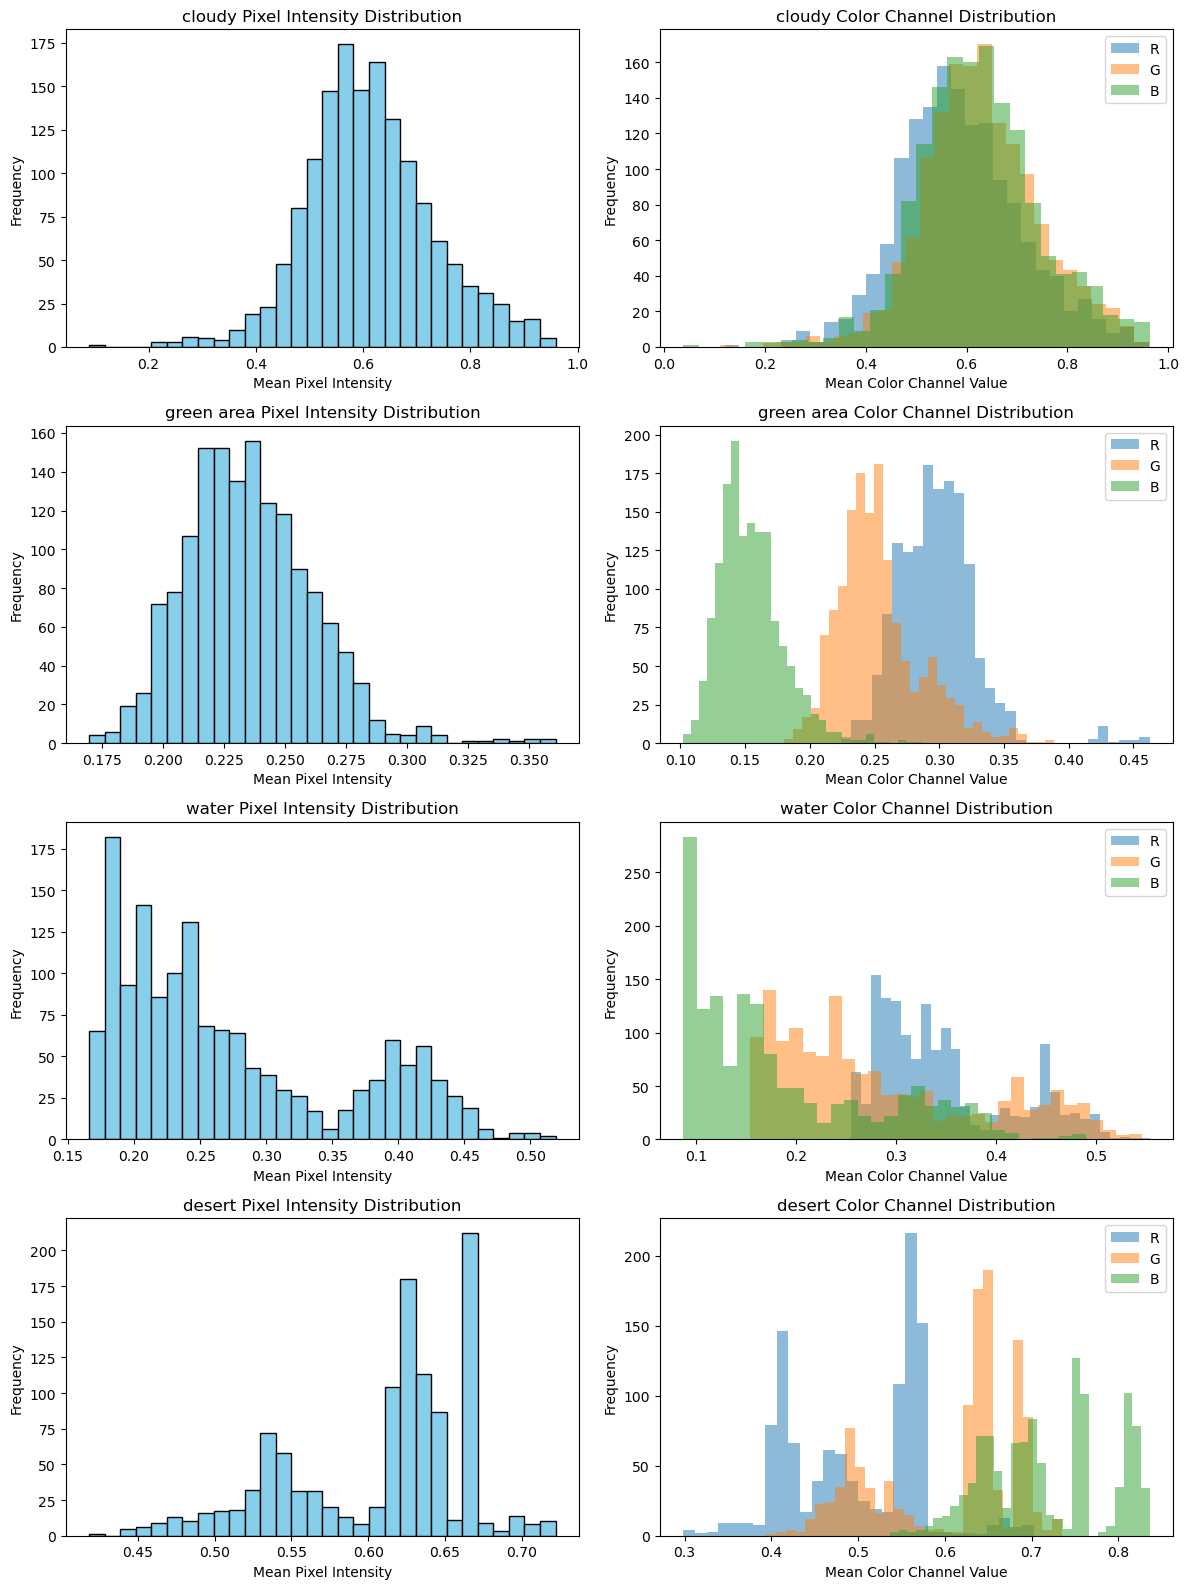

In [37]:
import os
import pandas as pd
import plotly.subplots as sp

# Define the classes and their respective directories
classes = ['cloudy', 'green area', 'water', 'desert']
directories = ['C:/Users/calve/Downloads/satdata/data/cloudy', 'C:/Users/calve/Downloads/satdata/data/green_area', 'C:/Users/calve/Downloads/satdata/data/water', 'C:/Users/calve/Downloads/satdata/data/desert']

fig, ax = plt.subplots(4, 2, figsize=(12, 16))

# Iterate over each class
for i in range(len(classes)):
    # Initialize lists to store pixel intensities and color channel values
    pixel_intensities = []
    color_channels = {'R': [], 'G': [], 'B': []}

    # Iterate over each image in the directory for the class
    for filename in os.listdir(directories[i]):
        img = cv2.imread(os.path.join(directories[i], filename))
        img = img / 255.0  # normalize pixel values

        # Add the mean pixel intensity of the image to the list
        pixel_intensities.append(np.mean(img))

        # Add the mean value of each color channel to the respective list
        color_channels['R'].append(np.mean(img[:,:,0]))
        color_channels['G'].append(np.mean(img[:,:,1]))
        color_channels['B'].append(np.mean(img[:,:,2]))

    # Plot histogram of pixel intensities for the class
    ax[i, 0].hist(pixel_intensities, bins=30, color='skyblue', edgecolor='black')
    ax[i, 0].set_title(f'{classes[i]} Pixel Intensity Distribution')
    ax[i, 0].set_xlabel('Mean Pixel Intensity')
    ax[i, 0].set_ylabel('Frequency')

    # Plot histogram of color channel values for the class
    for channel in color_channels:
        ax[i, 1].hist(color_channels[channel], bins=30, alpha=0.5, label=channel)
    ax[i, 1].set_title(f'{classes[i]} Color Channel Distribution')
    ax[i, 1].set_xlabel('Mean Color Channel Value')
    ax[i, 1].set_ylabel('Frequency')
    ax[i, 1].legend()

plt.tight_layout()
plt.show()

In [41]:
# Define the classes and their respective directories
classes = ['cloudy', 'green area', 'water', 'desert']
directories = ['C:/Users/calve/Downloads/satdata/data/cloudy', 'C:/Users/calve/Downloads/satdata/data/green_area', 'C:/Users/calve/Downloads/satdata/data/water', 'C:/Users/calve/Downloads/satdata/data/desert']

# Iterate over each class
for i in range(len(classes)):
    # Initialize lists to store pixel intensities and color channel values
    pixel_intensities = []
    color_channels = {'R': [], 'G': [], 'B': []}

    # Iterate over each image in the directory for the class
    for filename in os.listdir(directories[i]):
        img = cv2.imread(os.path.join(directories[i], filename))
        img = img / 255.0  # normalize pixel values

        # Add the mean pixel intensity of the image to the list
        pixel_intensities.append(np.mean(img))

        # Add the mean value of each color channel to the respective list
        color_channels['R'].append(np.mean(img[:,:,0]))
        color_channels['G'].append(np.mean(img[:,:,1]))
        color_channels['B'].append(np.mean(img[:,:,2]))

    # Create DataFrames for pixel intensities and color channels
    df_intensities = pd.DataFrame(pixel_intensities, columns=['intensity'])
    df_colors = pd.DataFrame(color_channels)

    # Print descriptive statistics for pixel intensities
    print(f'Descriptive Statistics for {classes[i]} Pixel Intensity Distribution')
    print(df_intensities.describe())
    print()

    # Print descriptive statistics for color channels
    print(f'Descriptive Statistics for {classes[i]} Color Channel Distribution')
    print(df_colors.describe())
    print()

Descriptive Statistics for cloudy Pixel Intensity Distribution
         intensity
count  1500.000000
mean      0.612943
std       0.118521
min       0.089300
25%       0.537273
50%       0.605138
75%       0.683026
max       0.958741

Descriptive Statistics for cloudy Color Channel Distribution
                 R            G            B
count  1500.000000  1500.000000  1500.000000
mean      0.586510     0.628292     0.624027
std       0.121103     0.116023     0.123031
min       0.120125     0.110602     0.037173
25%       0.506460     0.555955     0.542717
50%       0.578953     0.622615     0.618964
75%       0.659957     0.700405     0.694077
max       0.961183     0.961248     0.963241

Descriptive Statistics for green area Pixel Intensity Distribution
         intensity
count  1500.000000
mean      0.235144
std       0.025917
min       0.169573
25%       0.217312
50%       0.233309
75%       0.250965
max       0.360993

Descriptive Statistics for green area Color Channel Distrib

# Adjusting for Class Imbalance- Options

In [ ]:
#Oversampling
#is this the "splitting the data"

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# assume X_train and y_train are your data
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [ ]:
#Weighting the classes

from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

# Train the model
model.fit(X_train, y_train, class_weight=class_weights)

In [ ]:
#SPLITTING THE DATA UNLESS YOU ALREADY DID
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the images to a specific size
    transforms.ToTensor()
])

dataset = ImageFolder('C:/Users/calve/Downloads/satdata/data', transform=transform)


test_size = 0.2

num_dataset = len(dataset)
num_test = int(num_dataset * test_size)
num_train = num_dataset - num_test
print('Number of Points in Dataset - {0}'.format(num_dataset))
print('Number of Points in Training Dataset - {0}'.format(num_train))
print('Number of Points in Testing Dataset - {0}'.format(num_test))